<a href="https://colab.research.google.com/github/TEJASsKoundinya/Object-detection/blob/main/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inseption v3 for musical heights hackthon
## Automatic detection and suggestion  

In [3]:
import tensorflow as tf
tf.__version__
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [1]:
#import keras 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
#image size
IMAGE_SIZE = [224, 224]
#getting directive
test_dir = "/content/drive/MyDrive/dataset/test"
train_dir = "/content/drive/MyDrive/dataset/train"

In [5]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [6]:
for layer in inception.layers:
    layer.trainable = False

In [7]:
folders = glob('/content/drive/MyDrive/dataset/train/*')
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 59 images belonging to 9 classes.
Found 30 images belonging to 9 classes.


In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
2/2 [==============================] - 39s 18s/step - loss: 8.7914 - accuracy: 0.2034 - val_loss: 4.3796 - val_accuracy: 0.6667
Epoch 2/5
2/2 [==============================] - 12s 8s/step - loss: 3.8132 - accuracy: 0.7627 - val_loss: 3.1484 - val_accuracy: 0.6000
Epoch 3/5
2/2 [==============================] - 10s 6s/step - loss: 2.6526 - accuracy: 0.7797 - val_loss: 1.7053 - val_accuracy: 0.9000
Epoch 4/5
2/2 [==============================] - 12s 8s/step - loss: 2.3470 - accuracy: 0.8814 - val_loss: 1.1947 - val_accuracy: 0.9333
Epoch 5/5
2/2 [==============================] - 10s 6s/step - loss: 1.8185 - accuracy: 0.9153 - val_loss: 0.3861 - val_accuracy: 0.9667


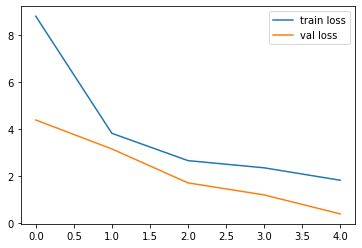

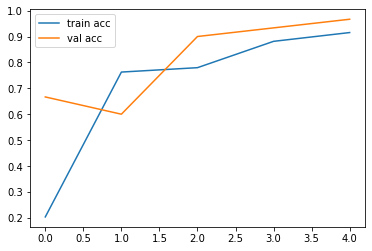

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt 
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/LUNG.h5')